# SafeDrive AI

# 📊 Análisis del Dataset UrbanSound8K

El dataset **UrbanSound8K** contiene metadatos de fragmentos de audio clasificados en diferentes categorías de sonidos urbanos.

## 📌 **Estructura del Dataset**
El dataset contiene las siguientes columnas:

| **Columna**        | **Descripción** |
|--------------------|---------------|
| `slice_file_name`  | Nombre del archivo de audio. |
| `fsID`            | ID del archivo original en Freesound. |
| `start` & `end`   | Tiempos de inicio y fin del fragmento dentro del audio original. |
| `salience`        | 1 = Sonido en primer plano, 2 = Sonido de fondo. |
| `fold`            | Número de "fold" para validación cruzada. |
| `classID`         | ID de la clase de sonido (0-9). |
| `class`           | Nombre de la clase de sonido (Ej: `siren`, `car_horn`). |

---

## 🎯 **Etiquetas de Clases en UrbanSound8K**
El dataset contiene **10 categorías de sonidos urbanos**:

| `classID` | **Clase de Sonido**       |
|-----------|--------------------------|
| 0         | air_conditioner          |
| 1         | car_horn                 |
| 2         | children_playing         |
| 3         | dog_bark                 |
| 4         | drilling                 |
| 5         | engine_idling            |
| 6         | gun_shot                 |
| 7         | jackhammer               |
| 8         | siren                    |
| 9         | street_music             |

📌 **Ejemplo de nombres de archivos en el dataset:**


In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import shutil

In [3]:
file_path = "datasets/UrbanSound8K/UrbanSound8K.csv"
df = pd.read_csv(file_path)

In [4]:
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [6]:
missing_values = df.isnull().sum()
missing_values

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [19]:
critical_sounds = ["car_horn", "siren", "engine_idling"]
df_filtered = df[df["class"].isin(critical_sounds)]
df_filtered[df_filtered["class"] == "siren"]

,slice_file_name,fsID,start,end,salience,fold,classID,class
114,102853-8-0-0.wav,102853,0.000000,4.000000,2,7,8,siren
115,102853-8-0-1.wav,102853,0.500000,4.500000,2,7,8,siren
116,102853-8-0-2.wav,102853,1.000000,5.000000,2,7,8,siren
117,102853-8-0-3.wav,102853,1.500000,5.500000,2,7,8,siren
118,102853-8-0-4.wav,102853,2.000000,6.000000,2,7,8,siren
...,...,...,...,...,...,...,...,...
8574,96657-8-0-1.wav,96657,122.837051,126.837051,2,8,8,siren
8575,96657-8-0-2.wav,96657,123.337051,127.337051,2,8,8,siren
8576,96657-8-0-3.wav,96657,123.837051,127.837051,2,8,8,siren
8642,98525-8-0-0.wav,98525,0.000000,4.000000,1,7,8,siren


In [20]:
class_distribution = df_filtered['class'].value_counts()
class_distribution

class
engine_idling    1000
siren             929
car_horn          429
Name: count, dtype: int64

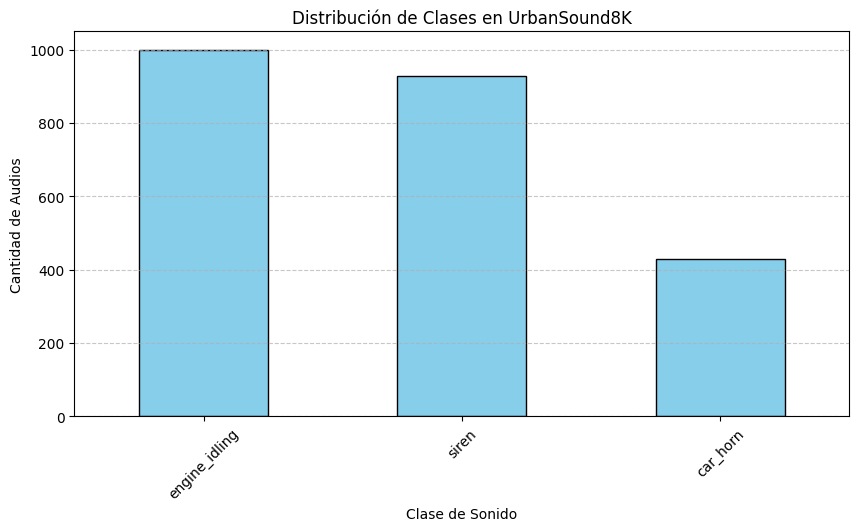

In [22]:
plt.figure(figsize=(10, 5))
df_filtered['class'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de Clases en UrbanSound8K")
plt.xlabel("Clase de Sonido")
plt.ylabel("Cantidad de Audios")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
numeric_stats = df_filtered.describe()
numeric_stats

,fsID,start,end,salience,fold,classID
count,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000
mean,106781.312977,35.141491,38.798255,1.432570,5.271841,5.454198
std,57424.509678,61.012386,61.064614,0.495537,2.773194,2.500620
min,2937.000000,0.000000,0.105962,1.000000,1.000000,1.000000
25%,62564.000000,3.000000,7.000000,1.000000,3.000000,5.000000
50%,107357.000000,8.722376,12.500000,1.000000,5.000000,5.000000
75%,157867.000000,35.359358,38.859358,2.000000,8.000000,8.000000
max,209992.000000,551.538647,555.538647,2.000000,10.000000,8.000000


In [24]:
unique_values = df_filtered.nunique()
unique_values

slice_file_name    2358
fsID                294
start              1626
end                1642
salience              2
fold                 10
classID               3
class                 3
dtype: int64

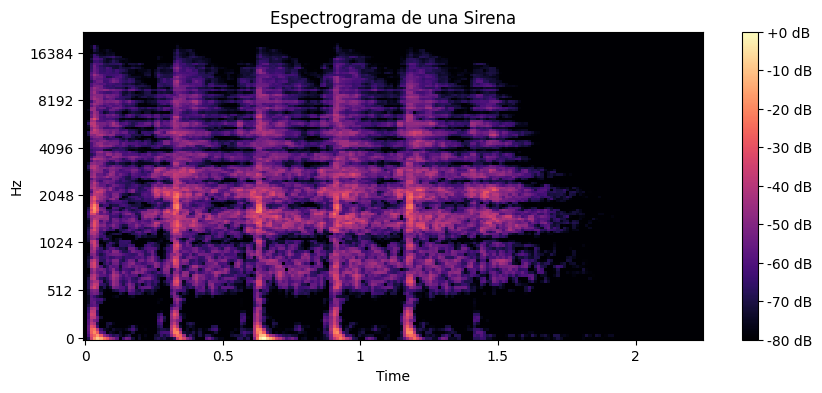

In [25]:
# Cargar un archivo de audio
y, sr = librosa.load("datasets/UrbanSound8K/fold1/7061-6-0-0.wav", sr=44100)

# Convertir a espectrograma
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Mostrar espectrograma
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Espectrograma de una Sirena")
plt.show()